Setting up necessary things

In [ ]:
!nvidia-smi

Fri Jun 28 18:07:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


The repository for squad contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/squad.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
import json
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Movie Genre Classifier/movie_details.csv")
df.head()

,title,url,summary,genres
0,Slave Play. Not a Movie. A Play.,https://www.metacritic.com/movie/slave-play-not-a-movie-a-play/,"Slave Play is one of Broadway’s most celebrated, genre-bending, and daring productions — breaking records and receiving critical acclaim for tackling race, sex, and interracial relationships. In the playful and provocative documentary Slave Play. Not A Movie. A Play., playwright Jeremy O. Harris takes viewers behind the scenes as he directs new actors through workshop rehearsals while turning his critical eye to the thoughts, inspirations, and creative process that brought the play to life.",['Documentary']
1,The Accidental Twins,https://www.metacritic.com/movie/the-accidental-twins/,Two sets of identical twins switched at birth in Colombia explore their complex history and new identities.,['Documentary']
2,Federer: Twelve Final Days,https://www.metacritic.com/movie/federer-twelve-final-days/,"Originally a home video never intended for public viewing, the film captures Federer at his most vulnerable and candid self, as he says goodbye to a game and the fans that shaped his life for the last two decades. Featuring interviews from legendary rivals and close friends Rafael Nadal, Novak Djokivic, and Andy Murray, Federer: Twelve Final Days provides unprecedented access to the relationship between these unparalleled stars.","['Sport', 'Documentary']"
3,Ghost: Rite Here Rite Now,https://www.metacritic.com/movie/ghost-rite-here-rite-now/,"Shot over the course of Ghost's two sold-out shows at Los Angeles' hallowed Kia Forum, Rite Here Rite Now fully immerses viewers in the technicolor melodrama of the vaunted live ritual that has helped to propel Sweden’s foremost theatrical rock export to Grammy-winning, chart-topping, arena-headlining status the world over.",['Music']
4,Inheritance,https://www.metacritic.com/movie/inheritance-2024/,"When an eccentric inventor and gameshow host suddenly passes away, a family of bickering oddballs gathers with hopes of inheriting his fortune. To everyone’s surprise, the unconventional uncle prepared one last game for them to determine who would receive his inheritance. It involves a series of tasks and puzzles, testing their ability to reconcile and work together.","['Comedy', 'Drama']"


In [ ]:
df.tail()

,title,url,summary,genres
25924,Sunrise,https://www.metacritic.com/movie/sunrise-1927/,"A man, Fallon (Alex Pettyfer) roams the land as a creature of the night as he comes to terms with tragic loss of his family at the hands of a brutal demagogue, Reynolds (Guy Pearce).","['Thriller', 'Horror']"
25925,The Jazz Singer,https://www.metacritic.com/movie/the-jazz-singer-1927/,The son of a Jewish Cantor (Neil Diamond) must defy the traditions of his religious father in order to pursue his dream of being a popular singer.,"['Drama', 'Romance', 'Music']"
25926,Battleship Potemkin,https://www.metacritic.com/movie/battleship-potemkin/,"In the midst of the Russian Revolution of 1905, the crew of the battleship Potemkin mutiny against the brutal, tyrannical regime of the vessel's officers. The resulting street demonstration in Odessa brings on a police massacre.","['Drama', 'History', 'War', 'Thriller']"
25927,Destiny (Der müde Tod),https://www.metacritic.com/movie/destiny-der-mude-tod/,"A young woman (Lil Dagover) confronts the personification of Death (Bernhard Goetzke), in an effort to save the life of her fiance (Walter Janssen). Death weaves three romantic tragedies and offers to unite the girl with her lover, if she can prevent the death of the lovers in at least one of the episodes. Thus begin three exotic scenarios of ill-fated love, in which the woman must somehow reverse the course of destiny: Persia, Quattrocento Venice, and a fancifully rendered ancient China. [Kino Lorber]","['Drama', 'Fantasy', 'Horror', 'Thriller']"
25928,Intolerance,https://www.metacritic.com/movie/intolerance/,"The story of a poor young woman, separated by prejudice from her husband and baby, is interwoven with tales of intolerance from throughout history.","['Drama', 'History']"


In [ ]:
df.shape

(25929, 4)

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(25929, 4)

In [ ]:
df.duplicated().sum()

552

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.shape

(25377, 4)

In [ ]:
genres_list = df.genres.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 27
{'Documentary': 4666, 'Sport': 816, 'Music': 1350, 'Comedy': 7387, 'Drama': 13531, 'Fantasy': 1847, 'Romance': 4359, 'Crime': 3489, 'Family': 1562, 'Animation': 854, 'Adventure': 2562, 'Thriller': 5840, 'Mystery': 2500, 'Horror': 2718, 'Action': 3621, 'Sci-Fi': 1779, 'History': 1401, 'Biography': 2008, 'Western': 373, 'Musical': 543, 'War': 951, 'News': 139, 'Unknown': 55, 'Reality-TV': 2, 'Game-Show': 2, 'Film-Noir': 42, 'Talk-Show': 1}


In [ ]:
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[1:]

(6, ['Unknown', 'Reality-TV', 'Game-Show', 'Film-Noir', 'Talk-Show'])

In [ ]:
genres_list = df.genres.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(25375, 4)

In [ ]:
df['revised_genres'] = revised_genre_list

In [ ]:
df.tail()

,title,url,summary,genres,revised_genres
25370,Sunrise,https://www.metacritic.com/movie/sunrise-1927/,"A man, Fallon (Alex Pettyfer) roams the land as a creature of the night as he comes to terms with tragic loss of his family at the hands of a brutal demagogue, Reynolds (Guy Pearce).","['Thriller', 'Horror']","[Thriller, Horror]"
25371,The Jazz Singer,https://www.metacritic.com/movie/the-jazz-singer-1927/,The son of a Jewish Cantor (Neil Diamond) must defy the traditions of his religious father in order to pursue his dream of being a popular singer.,"['Drama', 'Romance', 'Music']","[Drama, Romance, Music]"
25372,Battleship Potemkin,https://www.metacritic.com/movie/battleship-potemkin/,"In the midst of the Russian Revolution of 1905, the crew of the battleship Potemkin mutiny against the brutal, tyrannical regime of the vessel's officers. The resulting street demonstration in Odessa brings on a police massacre.","['Drama', 'History', 'War', 'Thriller']","[Drama, History, War, Thriller]"
25373,Destiny (Der müde Tod),https://www.metacritic.com/movie/destiny-der-mude-tod/,"A young woman (Lil Dagover) confronts the personification of Death (Bernhard Goetzke), in an effort to save the life of her fiance (Walter Janssen). Death weaves three romantic tragedies and offers to unite the girl with her lover, if she can prevent the death of the lovers in at least one of the episodes. Thus begin three exotic scenarios of ill-fated love, in which the woman must somehow reverse the course of destiny: Persia, Quattrocento Venice, and a fancifully rendered ancient China. [Kino Lorber]","['Drama', 'Fantasy', 'Horror', 'Thriller']","[Drama, Fantasy, Horror, Thriller]"
25374,Intolerance,https://www.metacritic.com/movie/intolerance/,"The story of a poor young woman, separated by prejudice from her husband and baby, is interwoven with tales of intolerance from throughout history.","['Drama', 'History']","[Drama, History]"


In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 21
{'Documentary': 4666, 'Sport': 816, 'Music': 1350, 'Comedy': 7387, 'Drama': 13531, 'Fantasy': 1847, 'Romance': 4359, 'Crime': 3489, 'Family': 1562, 'Animation': 854, 'Adventure': 2562, 'Thriller': 5840, 'Mystery': 2500, 'Horror': 2718, 'Action': 3621, 'Sci-Fi': 1779, 'History': 1401, 'Biography': 2008, 'Western': 373, 'Musical': 543, 'War': 951}


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [ ]:
print(encode_genre_types)

{'Documentary': 0, 'Sport': 1, 'Music': 2, 'Comedy': 3, 'Drama': 4, 'Fantasy': 5, 'Romance': 6, 'Crime': 7, 'Family': 8, 'Animation': 9, 'Adventure': 10, 'Thriller': 11, 'Mystery': 12, 'Horror': 13, 'Action': 14, 'Sci-Fi': 15, 'History': 16, 'Biography': 17, 'Western': 18, 'Musical': 19, 'War': 20}


In [ ]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

In [ ]:
categorical_genre_list[3][:23]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['genre_cat_list'] = categorical_genre_list
df.head()

,title,url,summary,genres,revised_genres,genre_cat_list
0,Slave Play. Not a Movie. A Play.,https://www.metacritic.com/movie/slave-play-not-a-movie-a-play/,"Slave Play is one of Broadway’s most celebrated, genre-bending, and daring productions — breaking records and receiving critical acclaim for tackling race, sex, and interracial relationships. In the playful and provocative documentary Slave Play. Not A Movie. A Play., playwright Jeremy O. Harris takes viewers behind the scenes as he directs new actors through workshop rehearsals while turning his critical eye to the thoughts, inspirations, and creative process that brought the play to life.",['Documentary'],[Documentary],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,The Accidental Twins,https://www.metacritic.com/movie/the-accidental-twins/,Two sets of identical twins switched at birth in Colombia explore their complex history and new identities.,['Documentary'],[Documentary],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Federer: Twelve Final Days,https://www.metacritic.com/movie/federer-twelve-final-days/,"Originally a home video never intended for public viewing, the film captures Federer at his most vulnerable and candid self, as he says goodbye to a game and the fans that shaped his life for the last two decades. Featuring interviews from legendary rivals and close friends Rafael Nadal, Novak Djokivic, and Andy Murray, Federer: Twelve Final Days provides unprecedented access to the relationship between these unparalleled stars.","['Sport', 'Documentary']","[Sport, Documentary]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,Ghost: Rite Here Rite Now,https://www.metacritic.com/movie/ghost-rite-here-rite-now/,"Shot over the course of Ghost's two sold-out shows at Los Angeles' hallowed Kia Forum, Rite Here Rite Now fully immerses viewers in the technicolor melodrama of the vaunted live ritual that has helped to propel Sweden’s foremost theatrical rock export to Grammy-winning, chart-topping, arena-headlining status the world over.",['Music'],[Music],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Inheritance,https://www.metacritic.com/movie/inheritance-2024/,"When an eccentric inventor and gameshow host suddenly passes away, a family of bickering oddballs gathers with hopes of inheriting his fortune. To everyone’s surprise, the unconventional uncle prepared one last game for them to determine who would receive his inheritance. It involves a series of tasks and puzzles, testing their ability to reconcile and work together.","['Comedy', 'Drama']","[Comedy, Drama]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
df.to_csv("prep_movie_details.csv", index = False)

# Dataloaders and Modeling

In [ ]:
labels = list(encode_genre_types.keys())

## DistilRoberta Base

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('summary'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "/content/drive/MyDrive/Movie Genre Classifier/dataloaders/dls-movie-genre-classifier-{model_name}.pkl")

In [ ]:
dls.vocab

['Documentary', 'Sport', 'Music', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Crime', 'Family', 'Animation', 'Adventure', 'Thriller', 'Mystery', 'Horror', 'Action', 'Sci-Fi', 'History', 'Biography', 'Western', 'Musical', 'War']

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"For charismatic party guy Jack Fuller and buttoned-up commodities trader Joy McNally, a rowdy weekend coincidentally shared in Las Vegas should have, by all rights, ended up being little more than a random blur. That is, if these two vacationing New Yorkers didn't have a signed marriage license staring them in the face to shockingly remind them of the giant misstep they took while feeling no pain, Vegas style. Stacking the deck, not only did Jack and Joy tie the knot after tying one on, but later scored a","[Comedy, Romance]"
1,"Narrated by legendary multimedia artist Laurie Anderson, Lisa Rovner’s Sisters with Transistors showcases the music of and rare interviews with female electronic pioneers Clara Rockmore, Delia Derbyshire, Daphne Oram, Éliane Radigue, Maryanne Amacher, Bebe Barron, Suzanne Ciani, Pauline Oliveros, Laurie Spiegel, and Wendy Carlos.. As Rovner’s documentary demonstrates, these women—many of whom were classically trained musicians, brilliant mathematicians, or a combination of both—relished the freedom of elec","[Documentary, Music]"
2,"A heist movie in the classic Hollywood tradition, Ladrón que roba a ladrón follows two crack thieves, Emilio and Alejandro, who reunite to rob the biggest thief they know – Moctesuma Valdez, a TV infomercial guru who’s made millions selling worthless health products to poor Latino immigrants. Valdez’s empire is next to impossible to infiltrate. But Emilio and Alejandro know if they go undercover as day laborers – chauffeurs, gardeners, maids, and repairmen – they can rob Valdez blind right under his nose.","[Comedy, Fantasy, Romance, Crime, Adventure, Action, Western]"
3,"Tim O’Brien has been called “the best American writer of his generation,” and America’s “poet laureate of war.” A Vietnam veteran, and National Book Award-winner, O’Brien is one of the great voices in modern American literature. The Library of Congress recently named his groundbreaking novel about the Vietnam War, The Things They Carried, one of the 65 most influential books in US history. But O’Brien hasn’t put pen to paper in nearly two decades. He swore off making sentences when, at a late age, he had h",[Documentary]


In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

# Stage - 0

In [ ]:
learner.freeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.001737800776027143, valley=0.00015848931798245758)

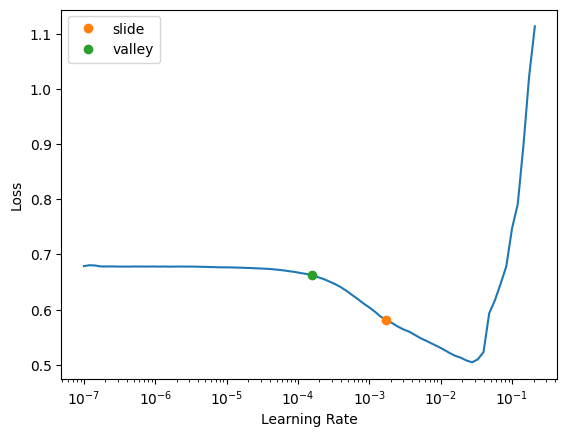

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
lr = (0.001737800776027143 + 0.00015848931798245758)/2
print(lr)

0.0009481450470048003


In [ ]:
learner.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.200475,0.190362,0.890065,01:09
1,0.179236,0.181672,0.899581,01:07


In [ ]:
learner.save("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/dls-movie-genre-classifier-{model_name}-stage-0")

Path('/content/drive/MyDrive/Movie Genre Classifier/dataloaders/dls-movie-genre-classifier-{model_name}-stage-0.pth')

In [ ]:
learner.export("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/dls-movie-genre-classifier-{model_name}-stage-0.pkl")

# Stage - 1

In [ ]:
learner.unfreeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0030199517495930195, valley=4.786300905834651e-06)

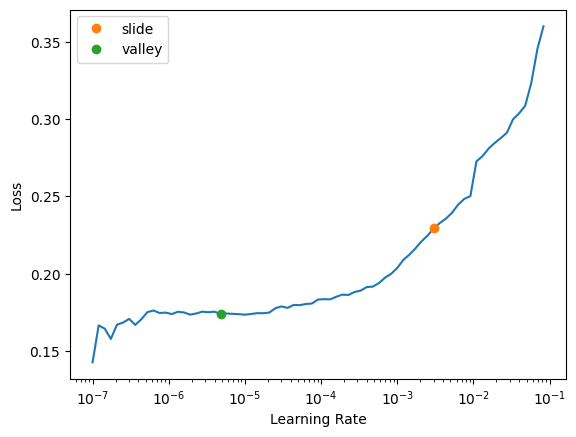

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
lr = (0.0030199517495930195 + 4.786300905834651e-06)/2
print(lr)

0.001512369025249427


In [ ]:
learner.fit_one_cycle(3,lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.317610,0.317641,0.834431,01:39
1,0.310619,0.308178,0.850085,01:41
2,0.310227,0.305703,0.855416,01:42


In [ ]:
learner.save("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-{model_name}-stage-1")

Path('/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-{model_name}-stage-1.pth')

In [ ]:
learner.export("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-{model_name}-stage-1.pkl")

## BERT

In [ ]:
model_name = "bert-base-uncased"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls = model_cls, config = config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('summary'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs = 32)

In [ ]:
torch.save(dls, "/content/drive/MyDrive/Movie Genre Classifier/dls-movie-genre-classifier-{model_name}.pkl")

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"for charismatic party guy jack fuller and buttoned - up commodities trader joy mcnally, a rowdy weekend coincidentally shared in las vegas should have, by all rights, ended up being little more than a random blur. that is, if these two vacationing new yorkers didn't have a signed marriage license staring them in the face to shockingly remind them of the giant misstep they took while feeling no pain, vegas style. stacking the deck, not only did jack and joy tie the knot after tying one on, but later scored a","[Comedy, Romance]"
1,"set in early - 1970s harlem, if beale street could talk is a timeless and moving love story of both a couple's unbreakable bond and the african - american family's empowering embrace, as told through the eyes of 19 - year old tish rivers ( kiki layne ). a daughter and wife - to - be, tish vividly recalls the passion, respect and trust that have connected her and her artist fiance alonzo hunt, who goes by the nickname fonny ( stephan james ). friends since childhood, the devoted couple dream of a future toge","[Drama, Romance]"
2,"across more than 50 years of essays, novels, screenplays, and criticism, joan didion has been our premier chronicler of the ebb and flow of america ’ s cultural and political tides with observations on her personal – and our own – upheavals, downturns, life changes, and states of mind. in the intimate, extraordinary documentary joan didion : the center will not hold, actor and director griffin dunne unearths a treasure trove of archival footage and talks at length to his “ aunt joan ” about the eras she cov","[Documentary, Biography]"
3,"froggy doo, the wisecracking marionette operated and voiced by happy herb, is loved by all the kids – all the kids except young elliott plumm. elliott ( 13 ) has outgrown the show and no longer believes in froggy doo ; in fact, he doesn't believe in much of anything anymore, least of all himself, which causes a considerable amount of tension between him and his five year - old brother rocky, who believes in everything – especially froggy doo. what's real for elliott is the anxiety he feels at home. his fath","[Drama, Family, Adventure]"


In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## Stage-0

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0030199517495930195, valley=0.0004786300996784121)

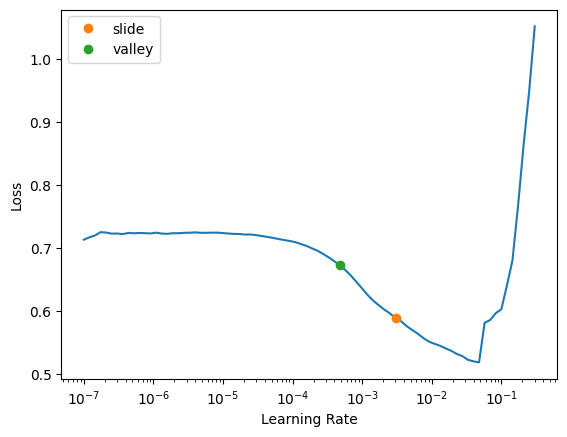

In [ ]:
learner.freeze()
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
lr = (0.0030199517495930195 + 0.0004786300996784121)/2
print(lr)

0.0017492909246357158


In [ ]:
learner.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.218438,0.207855,0.883045,02:14
1,0.197619,0.193815,0.889483,01:58


In [ ]:
learner.save("/content/drive/MyDrive/Movie Genre Classifier/movie-genre-classifier-{model_name}-stage-0")

Path('/content/drive/MyDrive/Movie Genre Classifier/movie-genre-classifier-{model_name}-stage-0.pth')

In [ ]:
learner.export("/content/drive/MyDrive/Movie Genre Classifier/movie-genre-classifier-{model_name}-stage-0.pkl")

## Stage-1

In [ ]:
learner.unfreeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.001737800776027143, valley=6.918309736647643e-06)

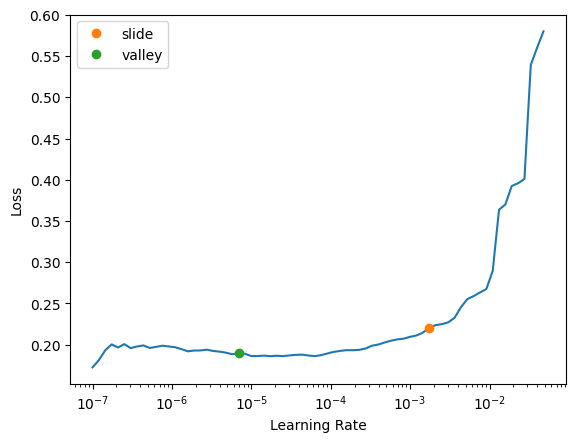

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
lr = (0.001737800776027143 + 6.918309736647643e-06)/2
print(lr)

0.0008723595428818953


In [ ]:
learner.fit_one_cycle(3,lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.321512,0.318605,0.837397,02:49
1,0.317485,0.316557,0.837397,02:50
2,0.319126,0.315661,0.837397,02:48


In [ ]:
learner.save("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-{model_name}-stage-1")

Path('/content/drive/MyDrive/Movie Genre Classifier/movie-genre-classifier-{model_name}-stage-1.pth')

In [ ]:
learner.export("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-{model_name}-classifier-stage-1.pkl")

## RoBERTa

In [ ]:
model_name = "roberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('summary'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs = 32)

In [ ]:
torch.save(dls, "/content/drive/MyDrive/Movie Genre Classifier/dataloaders/dls-movie-genre-classifier-roberta-base.pkl")

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"For charismatic party guy Jack Fuller and buttoned-up commodities trader Joy McNally, a rowdy weekend coincidentally shared in Las Vegas should have, by all rights, ended up being little more than a random blur. That is, if these two vacationing New Yorkers didn't have a signed marriage license staring them in the face to shockingly remind them of the giant misstep they took while feeling no pain, Vegas style. Stacking the deck, not only did Jack and Joy tie the knot after tying one on, but later scored a","[Comedy, Romance]"
1,"A few years after her mother's passing, 17-year old Tennie's reputation at school takes a major hit before the prom. To further complicate the daily rigors of teenage life, her father, Robert, an advertising executive who has since rebuilt his business, tries to do the same with his relationship with his daughter. Against his therapist's advice, overeager Robert tries really hard to get close to Tennie by showing his own way of caring. He tries to find out about his daughter's personal life with the help o",[Comedy]
2,"Britain, late-1970s. Punk is exploding. The country is deeply divided over immigration. The National Front, a far-right and fascist political party, is gaining strength as politicians like Enoch Powell push a xenophobic agenda. Outraged by a racist speech from Eric Clapton, music photographer Red Saunders writes a letter to the music press, calling for rock to be a force against racism. NME, Melody Maker, and Sounds all publish the letter. Flooded with responses, Red discovers many share his views. Teaming","[Documentary, Music]"
3,"Nate Cooper has been smitten with Cristabel Abbot since he first laid eyes on her at the impressionable age of six. But before he could try and snuggle up to her at nap time, or maybe send her a valentine, his family moved away. In the intervening years there have been other women in Nate's life, but none who could measure up to Cristabel. Convinced she's the only girl for him, Nate decides to move back to L.A. and track her down. The good news: she's still single and stunning. The bad news: there's a reas","[Comedy, Romance]"


In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## Stage-0

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.002511886414140463, valley=0.0003311311302240938)

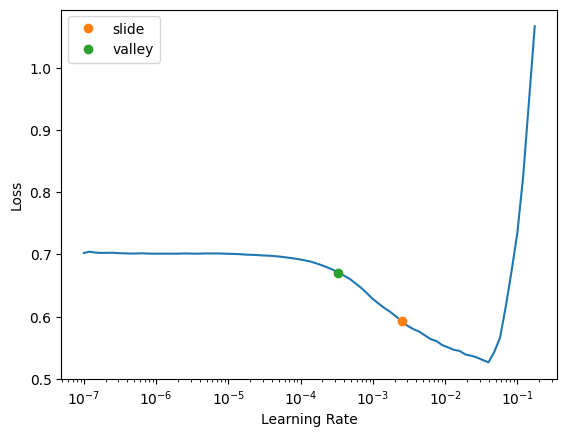

In [ ]:
learner.freeze()
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
lr = (0.002511886414140463 + 0.0003311311302240938)/2
print(lr)

0.0014215087721822783


In [ ]:
learner.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.195953,0.191169,0.884321,02:07
1,0.176074,0.174994,0.904030,01:56


In [ ]:
learner.save("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-{model_name}-stage-0")

Path('/content/drive/MyDrive/Movie Genre Classifier/movie-genre-classifier-roberta-base-stage-0.pth')

In [ ]:
learner.export("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-{model_name}-stage-0.pkl")

## Stage-1

In [ ]:
learner.unfreeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.00363078061491251, valley=1.0964781722577754e-06)

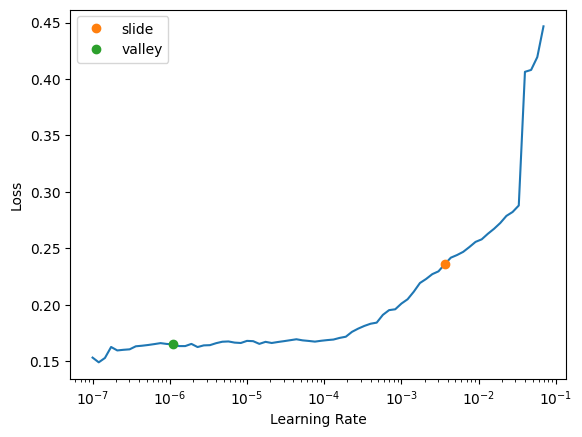

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
lr = (0.00363078061491251 + 1.0964781722577754e-06)/2
print(lr)

0.0018159385465423838


In [ ]:
learner.fit_one_cycle(3,lr)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.323115,0.318995,0.807534,03:13
1,0.319907,0.316684,0.807534,03:09
2,0.321234,0.315566,0.837397,02:57


In [ ]:
learner.save("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-roberta-base-stage-1")

Path('/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-roberta-base-stage-1.pth')

In [ ]:
learner.export("/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-roberta-base-stage-1.pkl")

# Inference and F1 score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Movie Genre Classifier/prep_movie_details.csv')

In [ ]:
df.columns

Index(['title', 'url', 'summary', 'genres', 'revised_genres',
       'genre_cat_list'],
      dtype='object')

In [ ]:
def convert_to_int(cell_value):
  return [int(x) for x in cell_value.strip('[]').split(',')]

df['genre_cat_list'] = df['genre_cat_list'].apply(convert_to_int)

In [ ]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(20300, 5075)

In [ ]:
valid_df = df.loc[valid_ids]
valid_df.head()

,title,url,summary,genres,revised_genres,genre_cat_list
14792,Real Steel,https://www.metacritic.com/movie/real-steel/,"A gritty, white-knuckle, action ride set in the near-future, where the sport of boxing has gone hi-tech. Charlie Kenton is a washed-up fighter who lost his chance at a title when 2000-pound, 8-foot-tall steel robots took over the ring. Now nothing but a small-time promoter, Charlie earns just enough money piecing together low-end bots from scrap metal to get from one underground boxing venue to the next. When Charlie hits rock bottom, he reluctantly teams up with his estranged son Max to build and train a championship contender. As the stakes in the brutal, no-holds-barred arena are raised...","['Action', 'Drama', 'Sport', 'Sci-Fi']","['Action', 'Drama', 'Sport', 'Sci-Fi']","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]"
396,Carol Doda Topless at the Condor,https://www.metacritic.com/movie/carol-doda-topless-at-the-condor/,"Against the backdrop of the 1964 Republican Convention, a San Francisco cocktail waitress became one of the city’s most popular entertainers after making her debut as America’s first topless dancer. Carol Doda Topless at the Condor tells the story of the fresh-faced girl next door who defied convention and the law by gyrating atop a white baby grand piano and turning a North Beach nightclub into the city’s second-most-popular tourist attraction after the Golden Gate Bridge. Meanwhile, Doda’s very public use of silicone to enhance her breasts launched a new industry. Directors Marlo McKenzi...",['Documentary'],['Documentary'],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9988,Little Men,https://www.metacritic.com/movie/little-men/,"Jake (Theo Taplitz) is a quiet, sensitive middle schooler with dreams of being an artist. He meets the affably brash Tony (Michael Barbieri) at his grandfather's funeral, and the unlikely pair soon hit it off. The budding friendship is put at risk, however, when a rent dispute between Jake's father, Brian (Greg Kinnear), and Tony's mother, Leonor (Paulina Garcia), threatens to become contentious.",['Drama'],['Drama'],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
20445,Code Unknown: Incomplete Tales of Several Journeys,https://www.metacritic.com/movie/code-unknown-incomplete-tales-of-several-journeys/,Five interrelated stories intersect on one event.,['Drama'],['Drama'],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
17194,Deep Water,https://www.metacritic.com/movie/deep-water/,A well-to-do husband who allows his wife to have affairs in order to avoid a divorce becomes a prime suspect in the disappearance of her lovers.,"['Crime', 'Thriller', 'Mystery', 'Drama']","['Crime', 'Thriller', 'Mystery', 'Drama']","[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
with open('/content/drive/MyDrive/Movie Genre Classifier/genre_types_encoded.json', 'r') as file:
  genre_encoder = json.load(file)

In [ ]:
from sklearn import metrics

def metric_measures(test_df, preds):

  targets = [np.asarray(target) for target in test_df['genre_cat_list'].to_list()]
  outputs = [np.asarray(pred) for pred in preds]


  accuracy = metrics.accuracy_score(targets, outputs)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')

  print(f"F1 Score (Micro) = {f1_score_micro: .4f}")
  print(f"F1 Score (Macro) = {f1_score_macro: .4f}")

  return

## Distil Roberta

In [ ]:
model_path = "/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-distilroberta-base-stage-1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

[{'labels': ['Drama'],
  'scores': [0.5350399613380432],
  'class_indices': [0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['Documentary', 'Sport', 'Music', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Crime', 'Family', 'Animation', 'Adventure', 'Thriller', 'Mystery', 'Horror', 'Action', 'Sci-Fi', 'History', 'Biography', 'Western', 'Musical', 'War'],
  'probs': [0.18250033259391785,
   0.03273264691233635,
   0.05216486006975174,
   0.28983592987060547,
   0.5350399613380432,
   0.06922438740730286,
   0.16906869411468506,
   0.13912241160869598,
   0.06084493175148964,
   0.033364225178956985,
   0.10325401276350021,
   0.23080159723758698,
   0.09822496771812439,
   0.108551524579525,
   0.14345769584178925,
   0.0688338354229927,
   0.05438384413719177,
   0.07782677561044693,
   0.014475641772150993,
   0.020464114844799042,
   0.03615349158644676]}]

In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

['Drama']

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  desc = row['summary']
  labels = learner_inf.blurr_predict(desc)[0]['labels']
  pred_genres = [0] * len(genre_encoder)
  for label in labels:
    pred_genres[genre_encoder[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5075 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) =  0.3075
F1 Score (Macro) =  0.0335


## Bert

In [ ]:
model_path = "/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-bert-base-uncased-stage-1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

[{'labels': ['Drama'],
  'scores': [0.5348949432373047],
  'class_indices': [0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['Documentary', 'Sport', 'Music', 'Comedy', 'Drama', 'Fantasy', 'Romance', 'Crime', 'Family', 'Animation', 'Adventure', 'Thriller', 'Mystery', 'Horror', 'Action', 'Sci-Fi', 'History', 'Biography', 'Western', 'Musical', 'War'],
  'probs': [0.16990593075752258,
   0.031950343400239944,
   0.050122201442718506,
   0.28956013917922974,
   0.5348949432373047,
   0.0750182718038559,
   0.1882677525281906,
   0.14922383427619934,
   0.0636252909898758,
   0.031496115028858185,
   0.0986955538392067,
   0.23931770026683807,
   0.09967151284217834,
   0.11645407229661942,
   0.1342315822839737,
   0.06921400874853134,
   0.051381915807724,
   0.07503839582204819,
   0.01753208041191101,
   0.022463170811533928,
   0.03722505271434784]}]

In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

['Drama']

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  desc = row['summary']
  labels = learner_inf.blurr_predict(desc)[0]['labels']
  pred_genres = [0] * len(genre_encoder)
  for label in labels:
    pred_genres[genre_encoder[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5075 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) =  0.3075
F1 Score (Macro) =  0.0335


## RoBERTa

In [ ]:
model_path = "/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-roberta-base-stage-1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

['Drama']

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  desc = row['summary']
  labels = learner_inf.blurr_predict(desc)[0]['labels']
  pred_genres = [0] * len(genre_encoder)
  for label in labels:
    pred_genres[genre_encoder[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5075 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) =  0.3075
F1 Score (Macro) =  0.0335


# ONNX

In [ ]:
! pip install -q onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.4 MB/s eta 0:00:00


In [ ]:
model_path = "/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-distilroberta-base-stage-1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
classifier = learner_inf.model.hf_model.eval()

torch.onnx.export(
    classifier,
    torch.LongTensor([[0] * 512]),
    '/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier.onnx',
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}
    }
)

In [ ]:
from onnxruntime.quantization import quantize_dynamic, QuantType

onnx_model_path = '/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier.onnx'
quantized_onnx_model_path = '/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-quantized.onnx'

quantize_dynamic(
    onnx_model_path,
    quantized_onnx_model_path,
    weight_type=QuantType.QUInt8,
)


## Inference

In [ ]:
with open('/content/drive/MyDrive/Movie Genre Classifier/genre_types_encoded.json', 'r') as file:
  genre_encoder = json.load(file)

## ONNX

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilroberts-base")

class_labels = list(genre_encoder.keys())

inf_session = rt.InferenceSession('/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['summary']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(genre_encoder)
  for label in labels:
    pred_genres[genre_encoder[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5075 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) =  0.3075
F1 Score (Macro) =  0.0335


## Quantized ONNX

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

class_labels = list(genre_encoder.keys())

inf_session = rt.InferenceSession('/content/drive/MyDrive/Movie Genre Classifier/dataloaders/movie-genre-classifier-quantized.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['summary']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(genre_encoder)
  for label in labels:
    pred_genres[genre_encoder[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5075 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) =  0.3075
F1 Score (Macro) =  0.0335
